# Plarium Datathon - Script Part


## Use case description:

At the end of April 2020, we've noticed a drop in our company's profit.
About 2 weeks later, we've detected a sharp drop in Retention rates . A smaller share of players continued to play beyond the first day of downloading our game.
The objective of your analysis is to try and identify the source or cause of these changes in our metrics and provide suggestions for recovery. <br/><br/>
## Dataset includes:

* __Date__
* __Country (top 11 countries and all others under "Rest of the world")__
* __Affiliates (top 11 affiliates and "Rest")__
* __Regs__ the number of players who've downloaded our game and started playing
* __Ret_Day1__ the number of players who've returned on the next day to play again
* __Ret_Day7__ the number of players who've returned 7 days later to play again
* __Spend__ the total sum we've invested in marketing activity
* __Depositors_DX (Day0, Day1, Day7, Day10 and Day30)__ the number of players who've purchased at least 1 item with real money, in our game (this is an accumulative number so for instance Day10 includes all depositors of the first 10 days)
* __Deposits_DX__ the number of purchases of items with real money, in our game (this is an accumulative number as well)
* __Deposit_Amount_DX__ the sum of real money used by players in our game (this is an accumulative number as well)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Convert the data to more "comfortable" format
The final dashboard will be displayed in tableau - so the main purpose of the following script is to clear the data and draw preliminary conclusions for a more convenient analysis afterwards.

In [2]:
data = pd.read_csv("Plarium_Dataset.csv")
data

,Date,Country,Affiliate,Regs,Ret_Day1,Ret_Day7,Complete_Tutorial,Spend,Depositors_D0,Deposits_D0,...,Deposit_Amount_D1,Deposits_D7,Depositors_D7,Deposit_Amount_D7,Deposits_D10,Depositors_D10,Deposit_Amount_D10,Deposits_D30,Depositors_D30,Deposit_Amount_D30
0,01/03/2020,Australia,Affiliate_27,37,13,7,33,$728,1,1,...,$30,10,3,$41,10,3,$41,20,3,$68
1,01/03/2020,Australia,Affiliate_31,1,0,0,0,$0,0,0,...,$0,0,0,$0,0,0,$0,0,0,$0
2,01/03/2020,Australia,Affiliate_34,15,5,4,13,$252,1,1,...,$3,1,1,$3,2,2,$26,4,3,$42
3,01/03/2020,Australia,Rest,38,11,5,32,$280,1,1,...,$31,6,3,$42,7,3,$66,12,3,$126
4,01/03/2020,Canada,Affiliate_27,76,29,11,60,"$1,812",2,2,...,$27,4,4,$45,5,4,$48,8,5,$58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,30/06/2020,USA,Affiliate_33,523,150,39,344,"$5,160",5,7,...,$403,35,10,$593,41,11,$696,109,15,"$1,574"
8911,30/06/2020,USA,Affiliate_34,987,327,111,699,"$17,787",13,17,...,$870,97,29,"$1,244",125,33,"$1,559",188,37,"$2,314"
8912,30/06/2020,USA,Affiliate_35,150,45,22,108,"$7,811",4,5,...,$272,38,16,$354,40,16,$398,53,18,$508
8913,30/06/2020,USA,Affiliate_36,"8,209",564,86,"3,501","$4,459",4,6,...,$125,13,8,$125,15,10,$129,20,11,$179


In [3]:
#Convert to int (the possible ones) , Delete extra signs & Convert to date time

for column in list(data.columns):
    data[column] = data[column].astype(str)
    data[column] = data[column].str.replace('$','',regex = True)
    data[column] = data[column].str.replace(',','',regex = True)
    
    try:
        data[column] = data[column].astype(int)
    except:
        pass
    
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
data

,Date,Country,Affiliate,Regs,Ret_Day1,Ret_Day7,Complete_Tutorial,Spend,Depositors_D0,Deposits_D0,...,Deposit_Amount_D1,Deposits_D7,Depositors_D7,Deposit_Amount_D7,Deposits_D10,Depositors_D10,Deposit_Amount_D10,Deposits_D30,Depositors_D30,Deposit_Amount_D30
0,2020-01-03,Australia,Affiliate_27,37,13,7,33,728,1,1,...,30,10,3,41,10,3,41,20,3,68
1,2020-01-03,Australia,Affiliate_31,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-03,Australia,Affiliate_34,15,5,4,13,252,1,1,...,3,1,1,3,2,2,26,4,3,42
3,2020-01-03,Australia,Rest,38,11,5,32,280,1,1,...,31,6,3,42,7,3,66,12,3,126
4,2020-01-03,Canada,Affiliate_27,76,29,11,60,1812,2,2,...,27,4,4,45,5,4,48,8,5,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,2020-06-30,USA,Affiliate_33,523,150,39,344,5160,5,7,...,403,35,10,593,41,11,696,109,15,1574
8911,2020-06-30,USA,Affiliate_34,987,327,111,699,17787,13,17,...,870,97,29,1244,125,33,1559,188,37,2314
8912,2020-06-30,USA,Affiliate_35,150,45,22,108,7811,4,5,...,272,38,16,354,40,16,398,53,18,508
8913,2020-06-30,USA,Affiliate_36,8209,564,86,3501,4459,4,6,...,125,13,8,125,15,10,129,20,11,179


In [5]:
data.columns

Index(['Date', 'Country', 'Affiliate', 'Regs', 'Ret_Day1', 'Ret_Day7',
       'Complete_Tutorial', 'Spend', 'Depositors_D0', 'Deposits_D0',
       'Deposit_Amount_D0', 'Deposits_D1', 'Depositors_D1',
       'Deposit_Amount_D1', 'Deposits_D7', 'Depositors_D7',
       'Deposit_Amount_D7', 'Deposits_D10', 'Depositors_D10',
       'Deposit_Amount_D10', 'Deposits_D30', 'Depositors_D30',
       'Deposit_Amount_D30'],
      dtype='object')

In [6]:
#Split the world to zones for identification of norms by zones

data['Zone'] = data['Country']
data.loc[(data.Country == "Spain") | (data.Country == "UK") | (data.Country == "Russia") | (data.Country == "France")| (data.Country == "Germany"),'Zone'] = 'Europe'
data.loc[(data.Country == "USA") | (data.Country == "Canada"),'Zone'] = 'NA'
data.loc[(data.Country == "Japan") | (data.Country == "Australia") | (data.Country == "South Korea"),'Zone'] = 'Asia'

In [7]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [8]:
data

,Date,Country,Affiliate,Regs,Ret_Day1,Ret_Day7,Complete_Tutorial,Spend,Depositors_D0,Deposits_D0,...,Deposit_Amount_D7,Deposits_D10,Depositors_D10,Deposit_Amount_D10,Deposits_D30,Depositors_D30,Deposit_Amount_D30,Zone,Month,Day
0,2020-01-03,Australia,Affiliate_27,37,13,7,33,728,1,1,...,41,10,3,41,20,3,68,Asia,1,3
1,2020-01-03,Australia,Affiliate_31,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Asia,1,3
2,2020-01-03,Australia,Affiliate_34,15,5,4,13,252,1,1,...,3,2,2,26,4,3,42,Asia,1,3
3,2020-01-03,Australia,Rest,38,11,5,32,280,1,1,...,42,7,3,66,12,3,126,Asia,1,3
4,2020-01-03,Canada,Affiliate_27,76,29,11,60,1812,2,2,...,45,5,4,48,8,5,58,NA,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,2020-06-30,USA,Affiliate_33,523,150,39,344,5160,5,7,...,593,41,11,696,109,15,1574,NA,6,30
8911,2020-06-30,USA,Affiliate_34,987,327,111,699,17787,13,17,...,1244,125,33,1559,188,37,2314,NA,6,30
8912,2020-06-30,USA,Affiliate_35,150,45,22,108,7811,4,5,...,354,40,16,398,53,18,508,NA,6,30
8913,2020-06-30,USA,Affiliate_36,8209,564,86,3501,4459,4,6,...,125,15,10,129,20,11,179,NA,6,30


In [9]:
data.to_csv('Plarium_Clean_Dataset.csv', index=False)

## Step 2: Identify the problems to ask the right questions
Early detection of problems will help verify their solution.

Per Date:


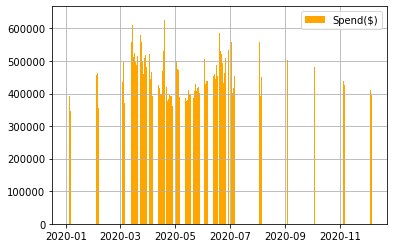

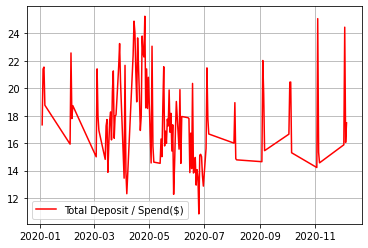

Per Month:


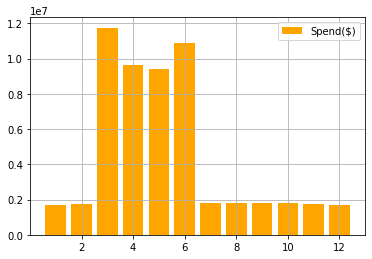

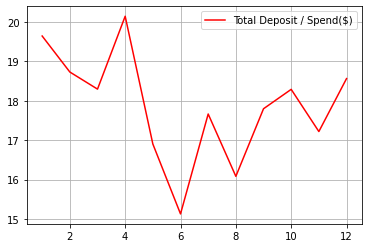

In [10]:
for i in ['Date','Month']:
    print('Per ' + i + ':')
    
    y = data.groupby([i]).sum().iloc[:,0].keys()

    x1 = data.groupby([i]).sum()['Spend']

    x2 = 100* data.groupby([i]).sum()['Deposit_Amount_D30'] / data.groupby([i]).sum()['Spend']
    
    plt.bar(y,x1,color='orange',label="Spend($)")

    plt.grid()
    plt.legend()
    plt.show()

    plt.plot(y,x2,color='red',label="Total Deposit / Spend($)")

    plt.grid()
    plt.legend()
    plt.show()

I would say that around April there are strange falls that are not typical of the period in the company’s profit. <br/>
We can verify this by looking at the number of users.

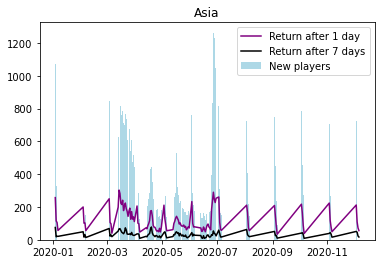

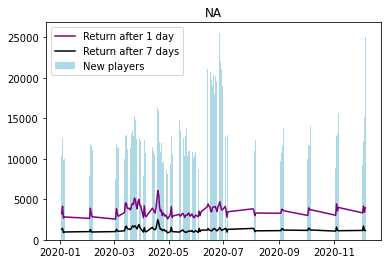

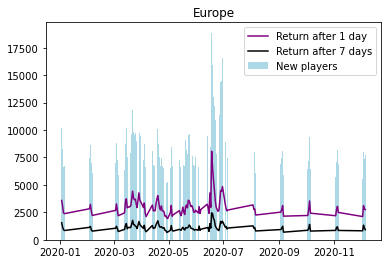

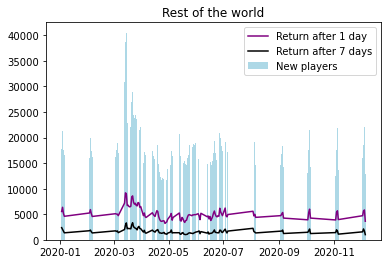

In [11]:
for country in data['Zone'].unique():
    
    data_per_country = data[data['Zone'] == country].groupby(['Date']).sum()
    y = data_per_country.iloc[:,0].keys()
    plt.title(country)
    
    plt.bar(y,data_per_country['Regs'],color = 'lightblue',label = 'New players')
    plt.plot(y,data_per_country['Ret_Day1'],color = 'purple',label = 'Return after 1 day')
    plt.plot(y,data_per_country['Ret_Day7'],color = 'black',label = 'Return after 7 days')
   

    plt.legend()
    plt.show()

Yes, around the globe more or less in the April area users do not return. <br/><br/>
## Step 3: Data pre - analysis
Let's look at the movement of user types per zone.

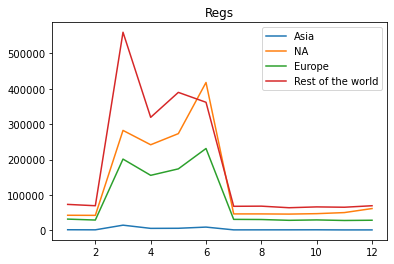

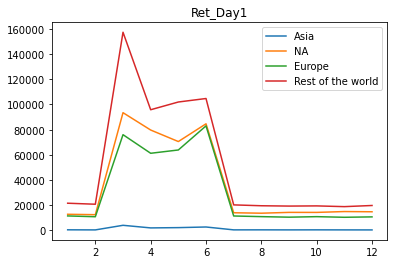

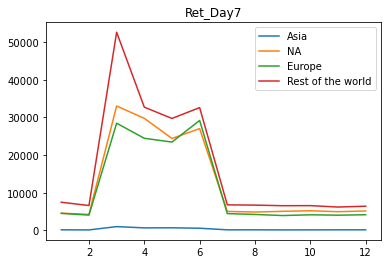

In [12]:
for player in ['Regs','Ret_Day1','Ret_Day7']:
    
    plt.title(player)
    
    for country in data['Zone'].unique():
        
        data_per_country = data[data['Zone'] == country].groupby(['Month']).sum()
        
        x = data_per_country[player]
        y = data_per_country.iloc[:,0].keys()
        
        plt.plot(y,x,label = country)
        
    plt.legend()
    plt.show()
    

Some interesting conclusions that can be seen:
* The drop in Asia makes a lot of sense compared to the rest of the world where the decline has been more brutal.
* It is easier to retain customers in Europe than in North America (where volatility is unstable).



Now intriguing at the business level: which countries are not worth investing in (That is, where the ratio of investment to profit is maximal).

In [14]:
Profit = data.groupby(['Month','Country']).sum()['Spend']/data.groupby(['Month','Country']).sum()['Deposit_Amount_D30']
Profit = dict(Profit)

In [15]:
Profit.keys()

Countries = ['Australia',
             'Canada',
             'France',
             'Germany',
             'Japan',
             'Rest of the world',
             'Russia',
             'South Korea',
             'Spain',
             'UK',
             'USA']

Months = list(range(1,13))

HeatMap = np.zeros((12,11))

for Mkey,Month in enumerate(Months):
    for Ckey,Country in enumerate(Countries):
        HeatMap[Mkey, Ckey] = Profit[(Month,Country)]

Goal: Min(Spend / Profit)


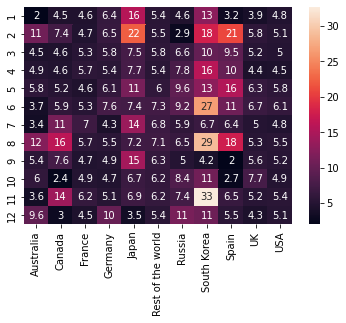

In [16]:
HeatMap = pd.DataFrame(HeatMap, index=Months, columns=Countries)
sns.heatmap(HeatMap, annot=True)

print('Goal: Min(Spend / Profit)')

Where there are high values one should check whether it is possible to reduce expenses. <br/>
__Japan, South Korea and Spain__ seem unequal to investment (Spain and Japan in the first months, South Korea in larger parts per year)

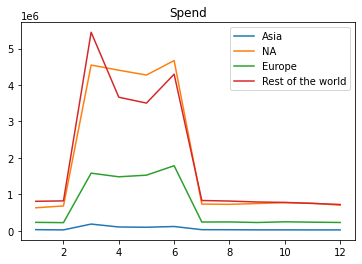

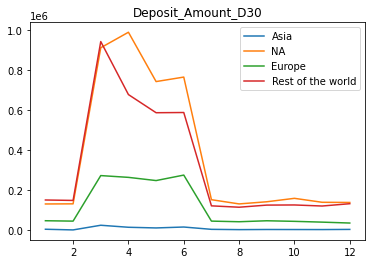

In [17]:
for money in ['Spend','Deposit_Amount_D30']:
    
    plt.title(money)
    
    for country in data['Zone'].unique():
        
        data_per_country = data[data['Zone'] == country].groupby(['Month']).sum()
        
        x = data_per_country[money]
        y = data_per_country.iloc[:,0].keys()
        
        rand_color = tuple(np.random.choice(range(256), size=3))
        
        plt.plot(y,x,label = country)
        
    plt.legend()
    plt.show()
    

Despite unsuccessful customer retention one has to consider the fact that the investment is making a nice profit in North America.

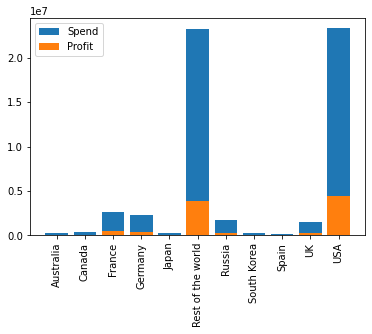

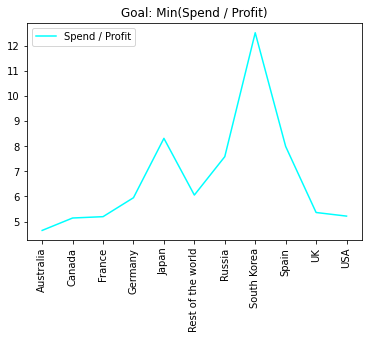

In [18]:
X1 = data.groupby(['Country']).sum()['Deposit_Amount_D30']
X2 = data.groupby(['Country']).sum()['Spend']
Y = data.groupby(['Country']).sum().iloc[:,0].keys()

plt.bar(Y,X2,label='Spend')
plt.bar(Y,X1,label = 'Profit')
plt.xticks(rotation=90)

plt.legend()
plt.show()

plt.title("Goal: Min(Spend / Profit)")
plt.plot(Y,X2/X1 ,color="cyan", label = "Spend / Profit")
plt.xticks(rotation=90)

plt.legend()
plt.show()

Now that we have examined the total for each country it is clear that Japan and South Korea are not worth a big investment (but also for Russia and Spain you should be careful). <br/>
__Yippee ki yay!!!__ It is now possible to examine the data in depth in Tableau.

<img width = "500" src = "https://cdn.dribbble.com/users/668001/screenshots/3861883/data-graphic-animation.gif"/>